# EDA to Predicton(DieTanic)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore') #주로 버전 차이에서 오는 경고 무시하기 위함
%matplotlib inline

sns.set(font_scale=2)

In [26]:
data = pd.read_csv('../input/titanic/train.csv')

In [12]:
data.isnull().sum(axis=0) #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- The Age,Cabin and Embarked have null values. I will try to fix them.

# 1. How many Survived?

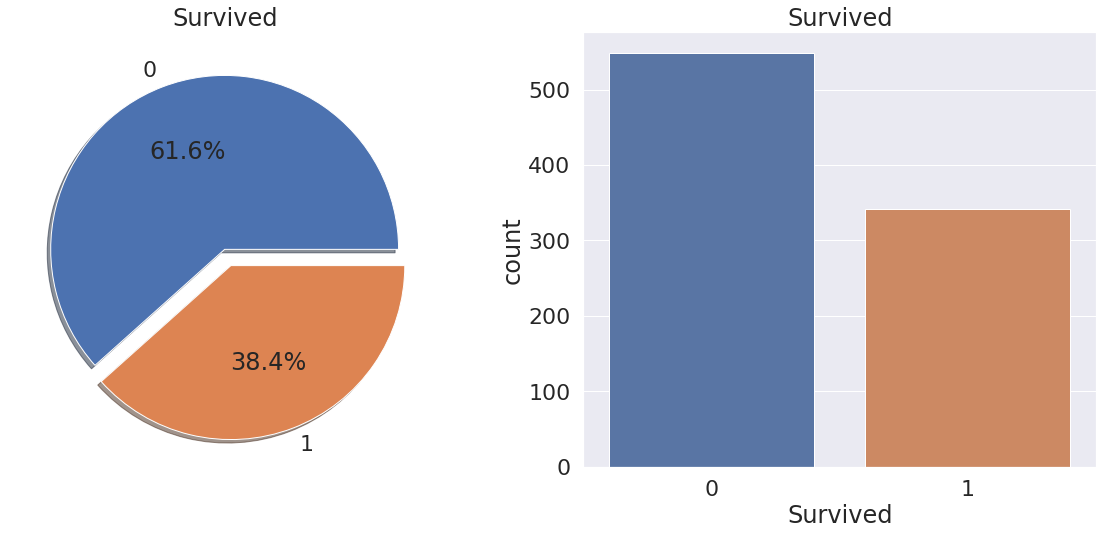

In [20]:
f,ax =plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- it is evident that not many passengers survived the accident.

- Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

- We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc.

- First let us understand the different types of features.

# 2. Type Of Features

### Categorical Features:
- A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. 
- For example, gender is a categorical variable having two categories (male and female).
- Now we cannot sort or give any ordering to such variables.They are also known as Nominal Variables.
- Categorical Features in the dataset: Sex, Embarked


### Ordinal Features:
- An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. 
- For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.
- Ordinal Features in the dataset : PClass

### Continuous Feature:
- A feature is said to be continuous if it can take values between any two points or between the minumum or maimum values in the features column.
- Continuous Features in the dataset: Age

## 3. Analysing The Features

#### 3-1. Sex -> Categorical Feature

In [35]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

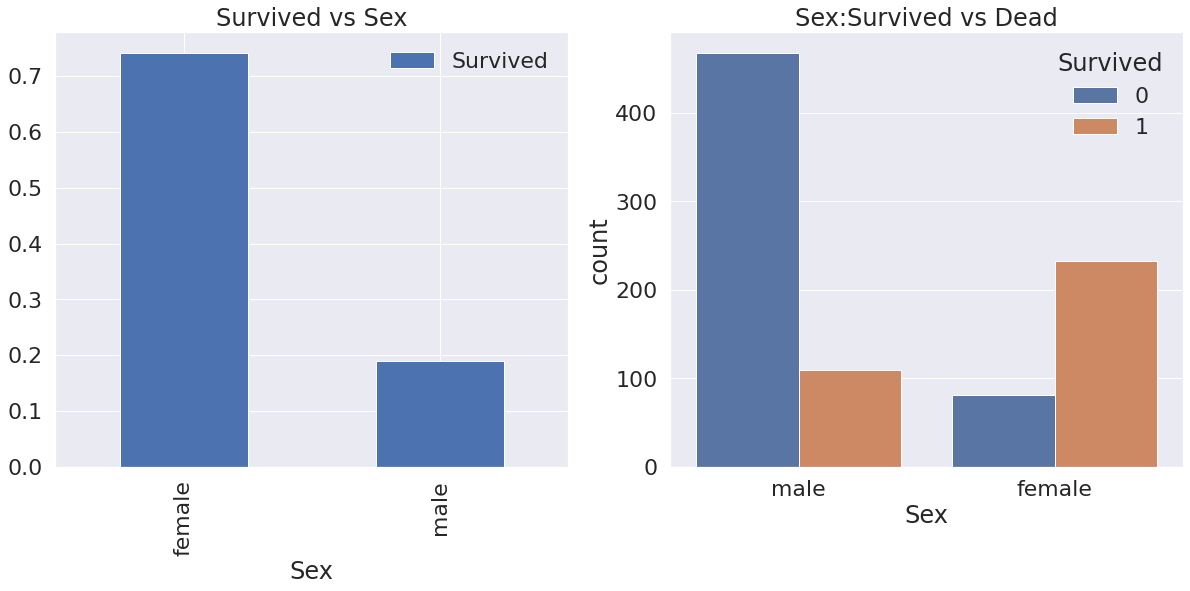

In [38]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- This looks interesting. The number of men on the ship is lot more than the number of women, Still the number of women saved is almost twice the number of males saved. 
- The survival rates for a women on the ship is around 75% while that for men in around 18~19%.

- This looks to be a very important feature for modeling.But is it the best?? Lets check other features.

#### 3-2. Pclass -> Ordinal Feature

In [41]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


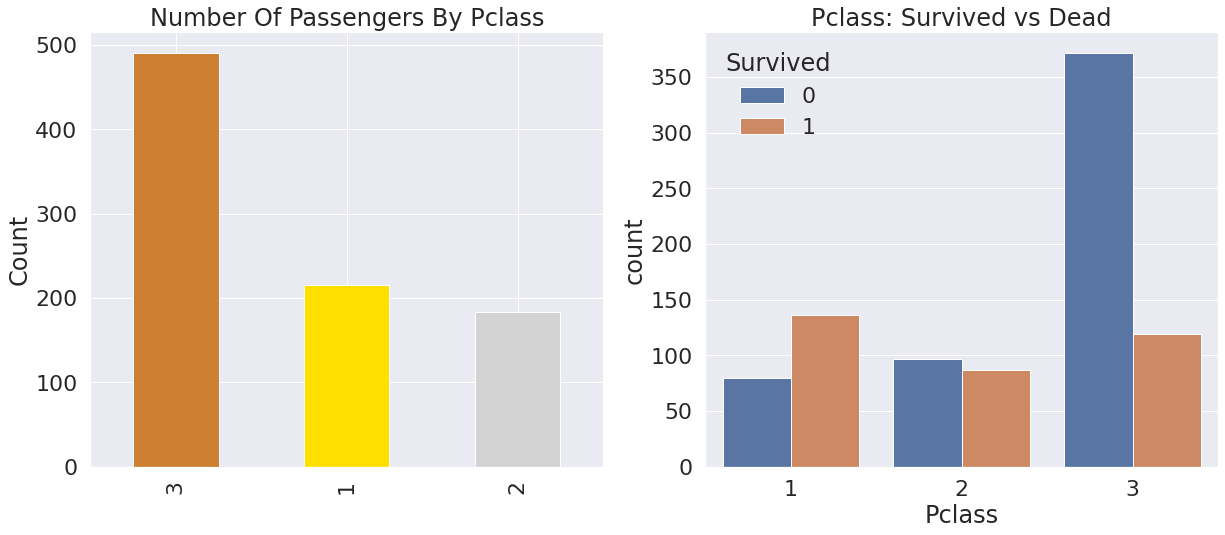

In [45]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

- People say Money Can't But Everything. But we can clearly see that Passengers Of Pclass1 were given a very high priority while rescue.
- Even though the number of Passengers in Pclass 3 were a lot higer,still the number of survival from tehm is very low, somewhere around 25%

- For Pclass1 %survied is around 63% while for Pclass2 is around 48%. So money and status matters. Such a materialistic world.

- Let Dive in little bit more and check for other interesting observations.Lets check survival rate with Sex and Pclass Together.

In [47]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')